In [1]:
import numpy as np
import pandas as pd
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

df = pd.read_csv('/mnt/infonas/data/pbansal/dataset/jantahack/train.csv')

In [4]:
week_mapping = dict({})
for i,x in enumerate(df.week.unique()):
    week_mapping[x] = i
store_mapping = dict({})
for i,x in enumerate(df.store_id.unique()):
    store_mapping[x] = i
sku_mapping = dict({})
for i,x in enumerate(df.sku_id.unique()):
    sku_mapping[x] = i
df['encoded_week'] = df.apply(lambda x : week_mapping[x['week']],axis=1)
df['encoded_store'] = df.apply(lambda x : store_mapping[x['store_id']],axis=1)
df['encoded_sku'] = df.apply(lambda x : sku_mapping[x['sku_id']],axis=1)
data = df[["encoded_week","encoded_store","encoded_sku","units_sold"]]

In [5]:
out_array = np.zeros((130,76,28)).astype(np.float32)
for x in df.iterrows():
    out_array[x[1]['encoded_week'],x[1]['encoded_store'],x[1]['encoded_sku']] = x[1]['units_sold']

In [9]:
np.random.seed(0)

np.save('dataset/2djantahack_complete',out_array)
np.save('dataset/1djantahack_complete',np.reshape(out_array,(out_array.shape[0],-1)))
all_examples = data.to_numpy()[:,:3]
np.random.shuffle(all_examples)
np.save('dataset/2djantahack_test_examples.npy',all_examples[int(4*all_examples.shape[0]/5):])
np.save('dataset/2djantahack_train_examples.npy',all_examples[:int(4*all_examples.shape[0]/5)])
temp = deepcopy(all_examples)
temp[:,1] = all_examples[:,1]*28 + all_examples[:,2]
temp = temp[:,:2]
np.save('dataset/1djantahack_test_examples.npy',temp[int(4*all_examples.shape[0]/5):])
np.save('dataset/1djantahack_train_examples.npy',temp[:int(4*all_examples.shape[0]/5)])

num_points = int(130*76*28)
all_examples = np.zeros((num_points,3))
id_ = 0
for i in range(130):
    for j in range(76):
        for k in range(28):
            all_examples[id_,0] = i
            all_examples[id_,1] = j
            all_examples[id_,2] = k
            id_ += 1
np.save('dataset/2djantahack_all_examples.npy',all_examples)

In [37]:
np.random.seed(0)

val_out_array = deepcopy(out_array)
train_out_array = deepcopy(out_array)
#validation_mask = np.zeros(out_array.shape)
validation_points = np.random.uniform(0,120,(76,28,2)).astype(np.int)
#ranges = np.random.uniform(low=5,high=15,size=(76,28,3)).astype(np.int)
val_points = []

for i in range(validation_points.shape[0]):
    for j in range(validation_points.shape[1]):
        for x in range(validation_points.shape[2]):
#             for y in range(validation_points[i][j][x],validation_points[i][j][x]+ranges[i][j][x]):
#                 if (y >= 130):
#                     continue
            val_points.append([validation_points[i][j][x],i,j])
            train_out_array[validation_points[i][j][x]:validation_points[i][j][x]+10,i,j] = np.nan
train_points = []
for i in range(115):
    for j in range(76):
        for k in range(28):
            if (np.isnan(train_out_array[i,j,k])):
                continue
            else :
                train_points.append([i,j,k])
                
np.save('dataset/2d_block_jantahack_test_examples.npy',np.array(val_points))
np.save('dataset/2d_block_jantahack_train_examples.npy',np.array(train_points))
#np.save('dataset/2d_block_jantahack_validation_mask.npy',validation_mask)
np.save('dataset/2d_block_jantahack_train',train_out_array)
np.save('dataset/2d_block_jantahack_test',val_out_array)

In [7]:
np.random.seed(0)
test_array = np.load('dataset/2d_block_jantahack_test.npy')
validation_points = np.random.uniform(0,120,(76,28,1)).astype(np.int)
for i in range(validation_points.shape[0]):
    for j in range(validation_points.shape[1]):
        for x in range(validation_points.shape[2]):
            test_array[validation_points[i][j][x]:validation_points[i][j][x]+10,i,j] = np.nan
np.save('dataset/single_file_test_janta.npy',test_array.reshape((test_array.shape[0],-1)))

In [40]:
val_points_continous = []
for i in range(train_out_array.shape[0]):
    for j in range(train_out_array.shape[1]):
        for k in range(train_out_array.shape[2]):
            if (np.isnan(train_out_array[i,j,k])):
                val_points_continous.append([i,j,k])
np.save('dataset/2d_block_jantahack_test_examples_continous.npy',np.array(val_points_continous))
            

In [38]:
train_out_array[:,2,16]

array([ 28.,  28.,  15.,   4.,   7.,  18.,  18.,   9.,   9.,  11.,   6.,
        23.,  34.,  14.,   4.,  14.,   5.,  12.,  23.,  26.,  23.,  16.,
        16.,  12.,  12.,  20.,  27.,  11.,  12.,  10.,   8.,  15.,   9.,
         4.,  17.,   7.,  67.,  33.,  33.,  40.,  11.,  10.,  21.,   5.,
        45.,  29.,  24.,  18.,  22.,  12.,  15.,  20.,  18.,  22.,  35.,
         8.,  24.,  17.,  15.,  24.,  46.,  31.,  99.,  65.,  15.,  10.,
        21.,   5.,  10.,   4.,  15.,   8.,  13.,  11.,  36.,  44.,  14.,
        13.,  58.,  11.,   8.,  18.,  22.,  85.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  20.,  13.,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,   9.,  66., 102.,  17.,
        10.,  15.,  61.,  44.,  54.,  39.,  50.,   7.,  11.,   7.,  26.,
        16.,  11.,  12.,  23.,  32.,  37.,  22.,  22.,  31.],
      dtype=float32)

In [15]:
for i in range(out_array.shape[2]):
    with open('/mnt/a99/d0/pbansal/contextualised_outlier_detection/BRITS/janta_raw/%d.txt'%i,'w+') as f:
        f.write('Time,Parameter,Value\n')
        for j in range(out_array.shape[0]):
            for k in range(out_array.shape[1]):
                f.write('%d:00,Shop%d,%d\n'%(j,k,out_array[j][k][i]))

In [29]:
for i in range(out_array.shape[2]):
    for j in range(out_array.shape[1]):
        with open('/mnt/a99/d0/pbansal/contextualised_outlier_detection/BRITS/janta_raw/%d.txt'%(i*out_array.shape[1]+j),'w+') as f:
            f.write('Time,Parameter,Value\n')
            temp_np = data.loc[(data['encoded_sku'] == i)&(data['encoded_store'] == j)].to_numpy()
            for j in range(temp_np.shape[0]):
                f.write('%d:00,Shop,%d\n'%(temp_np[j][0],temp_np[j][3]))

In [39]:
data.to_numpy()[:,3].std()

60.20770336467882

In [27]:
means = []
stds = []
for i in range(out_array.shape[1]):
    temp_np = data.loc[data['encoded_store'] == i].to_numpy()
    means.append(int(temp_np[:,3].mean()*100)/100)
    stds.append(int(temp_np[:,3].std()*100)/100)
print (means)
print (stds)
l = []
for i in range(out_array.shape[1]):
    l.append('Shop%d'%i)
print (l)

[51.73, 52.17, 51.85, 52.91, 50.16, 54.1, 50.61, 51.33, 53.47, 51.39, 50.6, 51.7, 51.88, 52.69, 51.31, 51.18, 50.51, 52.86, 52.87, 48.89, 49.92, 49.51, 52.31, 49.42, 53.92, 50.97, 53.89, 53.18, 50.47, 52.69, 51.75, 51.9, 52.46, 49.99, 52.49, 52.02, 48.94, 51.25, 53.65, 50.98, 53.3, 49.83, 50.95, 51.83, 52.47, 50.74, 49.2, 47.66, 53.04, 50.71, 51.25, 51.21, 50.74, 49.66, 49.46, 50.46, 52.07, 51.25, 52.5, 52.47, 54.23, 50.34, 51.27, 52.77, 54.02, 52.42, 49.37, 51.83, 52.75, 51.38, 52.99, 53.33, 52.81, 55.28, 50.75, 51.16]
[63.81, 57.68, 59.04, 60.68, 51.67, 74.7, 59.52, 63.39, 62.7, 62.73, 62.75, 60.92, 60.23, 61.83, 54.14, 56.58, 56.14, 56.25, 66.29, 48.93, 55.21, 41.63, 58.79, 52.94, 63.39, 56.62, 65.07, 58.49, 55.02, 62.35, 63.28, 57.07, 66.92, 54.13, 62.54, 64.23, 50.34, 56.08, 61.41, 53.61, 65.12, 50.07, 67.3, 63.74, 61.75, 51.32, 57.46, 52.44, 60.63, 58.95, 59.05, 58.86, 55.26, 54.1, 62.65, 52.74, 56.13, 53.75, 72.42, 59.52, 57.81, 57.28, 54.34, 63.96, 68.76, 64.32, 58.23, 61.9, 60

<AxesSubplot:>

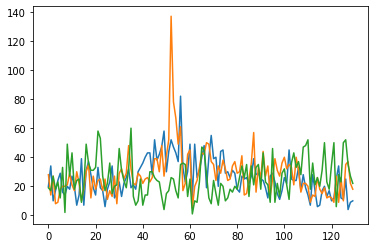

In [8]:
import seaborn as sns
sns.lineplot(x = np.arange(130),y=out_array[:,0,0])
sns.lineplot(x = np.arange(130),y=out_array[:,0,1])
sns.lineplot(x = np.arange(130),y=out_array[:,0,2])

In [71]:
row_sums = np.std(out_array,axis=0,keepdims=True)
row_sums[row_sums==0] = 1
norm_out_array = out_array / row_sums
np.save('dataset/jantahack_noshift_numpy_complete',norm_out_array)
np.save('dataset/jantahack_nonorm_numpy_complete',out_array)

In [73]:
all_examples = data.loc[(data['encoded_week'] < 128) & (data['encoded_week'] > 1)].to_numpy()
np.random.shuffle(all_examples)
np.save('dataset/jantahack_test_examples.npy',all_examples[int(9*all_examples.shape[0]/10):])
np.save('dataset/jantahack_train_examples.npy',all_examples[:int(2*all_examples.shape[0]/3)])

In [70]:
all_examples = data.to_numpy()
np.unique(all_examples[:,1:3],axis=0)

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       ...,
       [75, 16],
       [75, 17],
       [75, 22]])

In [6]:
def test_ (model,val_set):
    device = torch.device('cuda:1')
    batch_size = 64
    preds = []
    val_loader = torch.utils.data.DataLoader(val_set,shuffle=True,batch_size = batch_size,drop_last=False)
    model = model.to(device)
    loss_ = 0
    for x,y,index in val_loader :
        with torch.no_grad():
            x = x.to(device)
            y_pred,var = model(x)
            y = y.to(device)
            pred = ((y_pred-y)**2)/var + var
            loss_ +=  pred.mean().data*x.shape[0]
            pred = torch.exp(-0.5*pred).data
            for i in range(x.shape[0]):
                preds.append(((int(index[0][i]),int(index[1][i]),int(index[2][i])),float(pred[i]),float(var[i]),float(y_pred[i]),x[i].cpu()))
    loss_ = loss_/int(len(val_set))
    return loss_,np.array(preds)

In [9]:
import helper
import importlib
importlib.reload(helper)
val_set = helper.Dataset_('dataset/jantahack_noshift_numpy_complete.npy','dataset/jantahack_test_examples.npy')
epoch = 99
model = helper.NN()
model.load_state_dict(torch.load('/mnt/infonas/blossom/pbansal/janta_checkpoints/checkpoint_%d'%epoch))
_,truly_inlier_scores = test_(model,val_set)

loading dataset


/mnt/a99/d0/pbansal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
from ConditionalPredictor import helper as condHelper
import importlib
importlib.reload(condHelper)

val_set = condHelper.Dataset_('dataset/jantahack_noshift_numpy_complete.npy','dataset/jantahack_test_examples.npy')
epoch = 15
model = condHelper.NN_Janta()
model.load_state_dict(torch.load('/mnt/infonas/blossom/pbansal/janta_checkpoints_cond_pred/checkpoint_%d'%epoch))
_,cond_truly_inlier_scores = test_(model,val_set)

loading dataset


NameError: name 'test_' is not defined

In [5]:
torch.save(model.feat_embedd[1],'saved_embeddings/janta_shop.pt')
torch.save(model.feat_embedd[2],'saved_embeddings/janta_sku.pt')

In [19]:
temp_cond = cond_truly_inlier_scores[np.argsort(cond_truly_inlier_scores[:,1])]
temp_context = truly_inlier_scores[np.argsort(truly_inlier_scores[:,1])]
complete = np.load('dataset/jantahack_noshift_numpy_complete.npy')

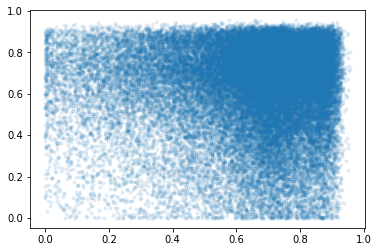

In [60]:
plt.scatter(x=truly_inlier_scores[:,1],y=cond_truly_inlier_scores[:,1],alpha=0.1,marker='.')

In [54]:
print ("Cond Rank, Context Rank")
# for i1 in range(20):
#     for i2,x in enumerate(temp_context):
#         if (x[0] == temp_cond[i1][0]):
#             print (i1,i2)

for i1 in range(20):
    for i2,x in enumerate(temp_cond):
        if (x[0] == temp_context[i1][0]):
            print (i2,i1)

Cond Rank, Context Rank
0 0
9 1
5 2
6 3
41 4
2 5
1 6
60 7
931 8
57 9
37 10
10 11
630 12
152 13
1137 14
15 15
166 16
113 17
14 18
49 19


In [58]:
#x,i = temp_cond,1137
x,i = temp_context,14
visualise(x[i],complete)

Index is :  (32, 48, 3) , Inlier Prob : 0.000020
Pred Value is : 3.033348,Deviation is : 0.653006
True Value : 114, Normalised Value : 6.731722
Input Features : 
tensor([ 4.5469,  2.7163,  3.7202,  2.7754, -0.2463,  0.2147,  0.1257,  0.1617,
        -0.8501,  0.0368, -0.0700,  0.0332,  1.0396,  0.5421,  0.3443,  0.4803,
         1.2986,  1.1093,  1.0324,  1.0435])
Time Series : 
[3.3068109 2.2439072 2.5982084 1.5943552 2.5391583 4.783066  4.1925635
 4.842116  4.783066  3.7201622 3.3068109 3.4249113 3.0115597 2.5391583
 1.8305559 2.480108  2.7753592 4.1925635 3.5430117 2.5391583 5.4326177
 3.4839613 2.7753592 3.1296601 3.1296601 3.6611118 4.251614  3.4249113
 5.137367  4.4878144 3.7201622 4.546865  6.731722  2.7163088 2.7753592
 4.960216  2.8344092 2.7163088 3.4249113 3.6611118 4.310664  2.125807
 3.07061   3.3068109 3.1296601 3.5430117 2.3620076 3.1296601 2.480108
 2.480108  1.7124556 2.9525096 4.0744634 2.5391583 3.0115597 6.790772
 2.8934593 4.0744634 2.5391583 3.7201622 3.5430117 2.

time-2  time-1   time  time+1  time+2
0     35.0    76.0   55.0    64.0    64.0
1     38.0    53.0   85.0    39.0    50.0
2     41.0    47.0   50.0    45.0    36.0
3     63.0    77.0  114.0    46.0    47.0
4     47.0    41.0   52.0    40.0    33.0
5     56.0    70.0   84.0    82.0    74.0
6     28.0    54.0   36.0    42.0    38.0
7     34.0   292.0   38.0    25.0    17.0
8     37.0   310.0   26.0    15.0    42.0
9     39.0    23.0   29.0    35.0    21.0
10    25.0    39.0   34.0    33.0    36.0
11    95.0    79.0   61.0    47.0    30.0
12    10.0    25.0   33.0    31.0    20.0
14    31.0    45.0   32.0    33.0    33.0
15    12.0    23.0   17.0    26.0    27.0
16    14.0     8.0    7.0    13.0    12.0
19    25.0    27.0   35.0    19.0    48.0
20    27.0    44.0   39.0    32.0    32.0
21    12.0     9.0   14.0     5.0     8.0

encoded_sku fixed as : 3


time-2  time-1   time  time+1  time+2
0     43.0    38.0   34.0    25.0    43.0
1    112.0   127.0  119.0   103.0   113.0
2     61.0    61.0   56.0    49.0    56.0
3     35.0    29.0   42.0    36.0    23.0
4    147.0   145.0  169.0   146.0   105.0
5     49.0    78.0   65.0    39.0    61.0
6    118.0   172.0  122.0   133.0    84.0
7     44.0    42.0   37.0    49.0    30.0
8     25.0    32.0   32.0    55.0    36.0
9     97.0   123.0   83.0    64.0    80.0
10    51.0    41.0   27.0    42.0    51.0
11    34.0    59.0   55.0    66.0    58.0
12    44.0    84.0  111.0    72.0    80.0
13    58.0    75.0   63.0    28.0    64.0
14    55.0    53.0   46.0    61.0    26.0
15    81.0   119.0   60.0    79.0    64.0
16    33.0    53.0   73.0    61.0    47.0
17    49.0    90.0   59.0    70.0    52.0
18    75.0   135.0   71.0    97.0    76.0
19    48.0    72.0   47.0    49.0    53.0
20    37.0    30.0   41.0    38.0    55.0
22    46.0    59.0   49.0    52.0    62.0
23    22.0    36.0   28.0    29.0    27.0
24   113.0   142.0   91.0   102.0    99.0
25    38.0    50.0   56.0    37.0    37.0
26    52.0    84.0   54.0    49.0    59.0
27    61.0    74.0   70.0    62.0    71.0
28    26.0    16.0   24.0    16.0    37.0
29   106.0   129.0   93.0    83.0   129.0
30    73.0    81.0   54.0    68.0    67.0
31    67.0    95.0   83.0    73.0   100.0
32    63.0    82.0   43.0    59.0    36.0
33    43.0    60.0   38.0    32.0    35.0
34    83.0    66.0   87.0    89.0    67.0
35    37.0    55.0   35.0    54.0    39.0
36    37.0    52.0   33.0    48.0    29.0
37    59.0    76.0   52.0    46.0    40.0
38    65.0    85.0   56.0    29.0    47.0
39    30.0    35.0   15.0    35.0    31.0
41    21.0    44.0   35.0    41.0    51.0
42    46.0    67.0   63.0    54.0    53.0
43    41.0    55.0   37.0    45.0    33.0
44    53.0    43.0   41.0    35.0    39.0
45    90.0   109.0   84.0    79.0    72.0
46    50.0    51.0   38.0    41.0    32.0
47    19.0    38.0   96.0    89.0    74.0
48    63.0    77.0  114.0    46.0    47.0
49    43.0    37.0   43.0    32.0    41.0
50    82.0    71.0   69.0    54.0    63.0
51    85.0    65.0   85.0    97.0    66.0
52    95.0   147.0   91.0    99.0    80.0
53    50.0    48.0   42.0    29.0    44.0
54    19.0    34.0   19.0    34.0    19.0
55    13.0    30.0   24.0    19.0    19.0
56    45.0    74.0   70.0    38.0    42.0
57    49.0   103.0   62.0    64.0    41.0
58    80.0    92.0   66.0    73.0    61.0
59    43.0    32.0   30.0    24.0    35.0
60    26.0    25.0   29.0    32.0    13.0
61    47.0    93.0   59.0    73.0    69.0
62   110.0   143.0  139.0   146.0   112.0
63    54.0    67.0   37.0    53.0    61.0
64    53.0    60.0   50.0    54.0    55.0
65   124.0   173.0  135.0   131.0   145.0
66    34.0    52.0   43.0    50.0    45.0
67    42.0    46.0   34.0    41.0    55.0
68    29.0    55.0   49.0    47.0    52.0
69    71.0    79.0   43.0    65.0    58.0
70    84.0    84.0   82.0    76.0    77.0
71    88.0   103.0   56.0    60.0    83.0
72   103.0    71.0   72.0    77.0   105.0
73    26.0    40.0   25.0    25.0    36.0
74   112.0    62.0   94.0    80.0    81.0
75    31.0    72.0   23.0    59.0    52.0

In [25]:
def visualise(in_,norm_out_array):
    index = in_[0]
    print ("Index is : ",index,", Inlier Prob : %f"%(in_[1]))
    print ("Pred Value is : %f,Deviation is : %f"%(in_[3],in_[2]))
    true_value = int(data.loc[(data["encoded_week"] == index[0]) & (data["encoded_store"] == index[1]) & (data["encoded_sku"] == index[2])]['units_sold'])
    time_series_value = norm_out_array[:,index[1],index[2]]
    normalised_value = time_series_value[index[0]]
    print ("True Value : %d, Normalised Value : %f"%(true_value,normalised_value))
    print ("Input Features : ")
    print (in_[4])

    print ("Time Series : ")
    print (time_series_value)
    temp_array = np.zeros((5,266+266))
    temp_data = data.loc[(data["encoded_week"] >= index[0]-2) & (data["encoded_week"] <= index[0]+2) & (data["encoded_store"] == index[1])]
    for x in temp_data.iterrows():
        temp_array[int(x[1]['encoded_week'])-index[0]+2][int(x[1]['encoded_sku'])] = x[1]['units_sold']    

    temp_data = data.loc[(data["encoded_week"] >= index[0]-2) & (data["encoded_week"] <= index[0]+2) & (data["encoded_sku"] == index[2])]
    for x in temp_data.iterrows():
        temp_array[int(x[1]['encoded_week'])-index[0]+2][266+int(x[1]['encoded_store'])] = x[1]['units_sold']    
    
    pd.set_option('display.max_rows', None)
    print ("encoded_store fixed as : %d"%index[1])
    temp_temp_data = pd.DataFrame(data=temp_array[:,:266].transpose(),index=np.arange(266),columns=['time-2','time-1','time','time+1','time+2'])
    display(temp_temp_data.loc[(temp_temp_data['time-2']!=0)|(temp_temp_data['time-1']!=0)|(temp_temp_data['time']!=0)|(temp_temp_data['time+1']!=0)|(temp_temp_data['time+2']!=0)])
    print ("encoded_sku fixed as : %d"%index[2])
    temp_temp_data = pd.DataFrame(data=temp_array[:,266:].transpose(),index=np.arange(266),columns=['time-2','time-1','time','time+1','time+2'])
    display(temp_temp_data.loc[(temp_temp_data['time-2']!=0)|(temp_temp_data['time-1']!=0)|(temp_temp_data['time']!=0)|(temp_temp_data['time+1']!=0)|(temp_temp_data['time+2']!=0)])
    return

In [20]:
from scipy.stats import norm
norm.ppf(0.05)

-1.6448536269514729

In [42]:
a = np.random.rand(4,6,5)
a

array([[[0.54017222, 0.91066244, 0.65710756, 0.66510466, 0.64861559],
        [0.70562858, 0.76136931, 0.72107595, 0.65321369, 0.82778584],
        [0.99669799, 0.7344307 , 0.79461561, 0.4517561 , 0.97861087],
        [0.82122365, 0.96459913, 0.81614016, 0.86730542, 0.40833494],
        [0.44140895, 0.33742961, 0.93887977, 0.45027763, 0.91468333],
        [0.41358068, 0.57999066, 0.96641342, 0.99807716, 0.73026103]],

       [[0.26696705, 0.06459247, 0.6995356 , 0.65201676, 0.9928125 ],
        [0.86305455, 0.2901498 , 0.26243215, 0.72806808, 0.71526876],
        [0.45826672, 0.11507728, 0.32654808, 0.374558  , 0.50131023],
        [0.77563388, 0.0170486 , 0.69268042, 0.8413135 , 0.35990342],
        [0.99621823, 0.17135542, 0.16061986, 0.65475523, 0.33996528],
        [0.07952897, 0.55486455, 0.38946226, 0.66810496, 0.6300951 ]],

       [[0.62758591, 0.6076867 , 0.2479199 , 0.52629374, 0.51465859],
        [0.27678634, 0.6713959 , 0.85903403, 0.48816354, 0.08703827],
        [0.69168

In [52]:
temp = np.argsort(a,axis=0)
ranks = np.empty_like(temp)
print(np.put_along_axis(ranks, temp, np.repeat(np.repeat(np.arange(temp.shape[0])[:,None],temp.shape[1],axis=1)[:,:,None], temp.shape[2], axis=2), axis=0))

None


In [67]:
print (a)
print (np.reshape(a,(a.shape[0],-1)))

[[[0.54017222 0.91066244 0.65710756 0.66510466 0.64861559]
  [0.70562858 0.76136931 0.72107595 0.65321369 0.82778584]
  [0.99669799 0.7344307  0.79461561 0.4517561  0.97861087]
  [0.82122365 0.96459913 0.81614016 0.86730542 0.40833494]
  [0.44140895 0.33742961 0.93887977 0.45027763 0.91468333]
  [0.41358068 0.57999066 0.96641342 0.99807716 0.73026103]]

 [[0.26696705 0.06459247 0.6995356  0.65201676 0.9928125 ]
  [0.86305455 0.2901498  0.26243215 0.72806808 0.71526876]
  [0.45826672 0.11507728 0.32654808 0.374558   0.50131023]
  [0.77563388 0.0170486  0.69268042 0.8413135  0.35990342]
  [0.99621823 0.17135542 0.16061986 0.65475523 0.33996528]
  [0.07952897 0.55486455 0.38946226 0.66810496 0.6300951 ]]

 [[0.62758591 0.6076867  0.2479199  0.52629374 0.51465859]
  [0.27678634 0.6713959  0.85903403 0.48816354 0.08703827]
  [0.69168215 0.36313543 0.76184486 0.29585205 0.75721035]
  [0.38101412 0.31548963 0.76144522 0.98173174 0.50173081]
  [0.05457362 0.31233196 0.98704786 0.53183049 0.095